## Description
In this lab, you will continue working with the airline delay dataset, focusing on data cleaning, preprocessing, and visualization techniques. You'll practice handling missing values, data normalization, binning, and creating indicator variables using R and the tidyverse package.

# Tasks
### Task 1: Data Inspection and Handling Missing Values (25 points)

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In [2]:
url <- 'https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz'

download.file(url, destfile = "/kaggle/working/lax_to_jfk.tar.gz")

untar("lax_to_jfk.tar.gz", exdir ="internal")

In [3]:
sub_airline <- read_csv("/kaggle/working/internal/lax_to_jfk/lax_to_jfk.csv",
                        col_types = cols(
                        DivDistance = col_number(),
                        DivArrDelay = col_number()
                        ))

In [4]:
head(sub_airline)
dim(sub_airline)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,⋯,2,NA,NA,NA,NA,NA,-1,0,NA,NA
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,⋯,0,NA,NA,NA,NA,NA,4,4,NA,NA
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,⋯,0,NA,NA,NA,NA,NA,-8,0,NA,NA
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,⋯,0,NA,NA,NA,NA,NA,7,7,NA,NA
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,⋯,0,NA,NA,NA,NA,NA,-4,0,NA,NA
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,⋯,0,NA,NA,NA,NA,NA,2,2,NA,NA


[1] 2855   21

In [5]:
map(sub_airline, ~sum(is.na(.)))

$Month
[1] 0

$DayOfWeek
[1] 0

$FlightDate
[1] 0

$Reporting_Airline
[1] 0

$Origin
[1] 0

$Dest
[1] 0

$CRSDepTime
[1] 0

$CRSArrTime
[1] 0

$DepTime
[1] 0

$ArrTime
[1] 0

$ArrDelay
[1] 0

$ArrDelayMinutes
[1] 0

$CarrierDelay
[1] 2486

$WeatherDelay
[1] 2486

$NASDelay
[1] 2486

$SecurityDelay
[1] 2486

$LateAircraftDelay
[1] 2486

$DepDelay
[1] 0

$DepDelayMinutes
[1] 0

$DivDistance
[1] 2855

$DivArrDelay
[1] 2855

#### a.  Remove rows with missing values in specific columns

In [6]:
drop_na_columns <- sub_airline %>% select(-DivDistance, -DivArrDelay)

In [7]:
drop_na_rows <- drop_na_columns %>% drop_na(CarrierDelay)

dim(drop_na_rows)
head(drop_na_rows)

[1] 369  19

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,5,2018-08-03,B6,LAX,JFK,0013,0839,0034,0913,34,34,11,0,23,0,0,21,21
6,4,2006-06-01,AA,LAX,JFK,1515,2332,1507,2353,21,21,0,0,21,0,0,-8,0
1,7,2007-01-28,UA,LAX,JFK,0845,1656,0838,1713,17,17,0,0,17,0,0,-7,0
6,5,2013-06-28,AA,LAX,JFK,1200,2045,1328,2220,95,95,5,0,7,0,83,88,88
9,1,2010-09-27,DL,LAX,JFK,1330,2208,1426,2316,68,68,0,0,68,0,0,56,56
10,3,2005-10-12,AA,LAX,JFK,0930,1755,0958,1823,28,28,0,0,28,0,0,28,28


#### b. Replace missing values with appropriate measures (e.g., mean, median)

In [8]:
meanC = mean(sub_airline$CarrierDelay, na.rm=TRUE)
meanW = mean(sub_airline$WeatherDelay,na.rm=TRUE)
meanN = mean(sub_airline$NASDelay,na.rm=TRUE)
meanS = mean(sub_airline$SecurityDelay,na.rm=TRUE)
meanL = mean(sub_airline$LateAircraftDelay,na.rm=TRUE)

sub_airline <- sub_airline %>% replace_na(list(CarrierDelay=meanC,
                                                  WeatherDelay=meanW,
                                                  NASDelay=meanN,
                                                  SecurityDelay=meanS,
                                                  LateAircraftDelay=meanL))


In [9]:
dim(sub_airline)

[1] 2855   21

### Student Evaluation and Comments
After completing Task 1, evaluate your approach:

<h3> Which columns had the most missing values? </h3>
DivDistance (2855) and DivArrDelay (2855) have the most missing value.
<h3>What were the pros and cons of each missing value strategy you implemented? </h3>
Replacing NA with the mean is fast and useful for normally distributed data but can introduce bias and reduce variability in complex datasets.
<h3>How did the dimensions of the dataset change after handling missing values?</h3>
2855.19

## Task 2: Data Normalization (25 points)


Implement three different normalization techniques on the "ArrDelay" and "DepDelay" columns: a. Simple scaling b. Min-Max scaling c. Z-score standardization

In [10]:
# MIN-MAX SCALLING 
sub_airline <- sub_airline %>%
   mutate(ArrScaled = (ArrDelay - min(ArrDelay, na.rm=TRUE)) / (max(ArrDelay,na.rm=TRUE) - min(ArrDelay,na.rm=TRUE)))# mutate: create a modify columns within a dataframe

sub_airline <- sub_airline %>%
   mutate(DepScaled = (DepDelay - min(DepDelay, na.rm=TRUE)) / (max(DepDelay,na.rm=TRUE) - min(DepDelay,na.rm=TRUE)))

In [11]:
# Z-SCORE
sub_airline <- sub_airline %>%
  mutate(zs_ArrDelay = ((ArrDelay - mean(ArrDelay,na.rm=TRUE))/sd(ArrDelay, na.rm=TRUE)))

sub_airline <- sub_airline %>%
  mutate(zs_DepDelay = ((DepDelay - mean(DepDelay,na.rm=TRUE))/sd(DepDelay, na.rm=TRUE)))

In [12]:
head(sub_airline)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay,ArrScaled,DepScaled,zs_ArrDelay,zs_DepDelay
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,⋯,0.7262873,12.66667,-1,0,NA,NA,0.09933775,0.02409639,-0.04815631,-0.28063352
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,⋯,0.7262873,12.66667,4,4,NA,NA,0.06887417,0.03078983,-0.60922513,-0.14031185
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,⋯,0.7262873,12.66667,-8,0,NA,NA,0.07814570,0.01472557,-0.43846505,-0.47708387
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,⋯,0.7262873,12.66667,7,7,NA,NA,0.09271523,0.03480589,-0.17012779,-0.05611884
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,⋯,0.7262873,12.66667,-4,0,NA,NA,0.07947020,0.02008032,-0.41407075,-0.36482653
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,⋯,0.7262873,12.66667,2,2,NA,NA,0.07019868,0.02811245,-0.58483083,-0.19644052


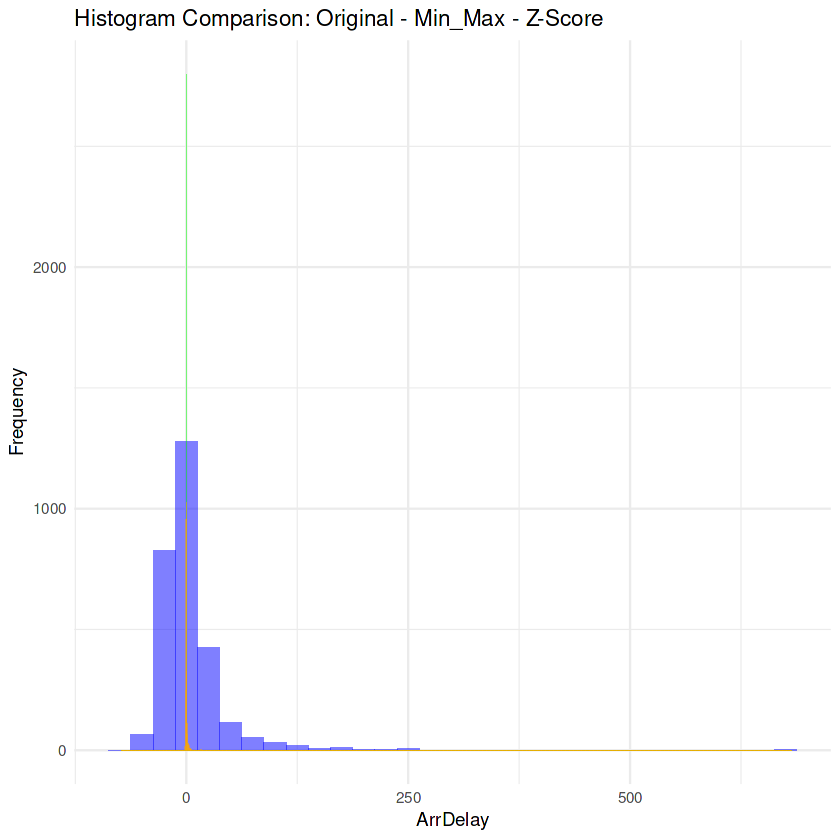

In [13]:
library(ggplot2)

ggplot(sub_airline, aes(x=ArrDelay)) +
       geom_histogram(binwidth=25, fill="blue", alpha=0.5) +
       geom_histogram(aes(x=ArrScaled), binwidth=0.5, fill = "green", alpha=0.5) +
       geom_histogram(aes(x=zs_ArrDelay), binwidth=0.5, fill ="orange", alpha=0.5) +
       labs(title = "Histogram Comparison: Original - Min_Max - Z-Score",
           x = 'ArrDelay',
           y = 'Frequency') +
       theme_minimal()

#### How did the distribution of the data change after each normalization technique?
1. Original Data Distribution
Range: The data can have any range, depending on the dataset.
Mean and Standard Deviation: The mean and spread (standard deviation) of the data will vary naturally depending on the dataset's original distribution (e.g., normal, skewed).
Shape: The shape of the distribution is untouched in the original dataset.
2. Min-Max Scaling
Range: After min-max scaling, the values are transformed to fall within a specific range, usually between 0 and 1. The minimum value in the original data becomes 0, and the maximum becomes 1.
Effect on Mean and Standard Deviation: The mean and standard deviation will change, but the shape of the distribution remains the same.
Shape: The distribution's shape remains unchanged. This scaling only adjusts the range of values without altering the relationships between the data points.
Key Points:
Maintains the relative distances between values but compresses them into a [0,1] range.
Useful when you want to maintain the original distribution but rescale it to a fixed range.
3. Z-Score Normalization
Range: Z-score normalization rescales the data such that the mean of the distribution is 0 and the standard deviation is 1. Most values will fall between -3 and +3 (depending on the spread of the original data).
Effect on Mean and Standard Deviation: After z-score normalization, the mean of the data will be 0, and the standard deviation will be 1.
Shape: Like min-max scaling, the shape of the distribution doesn't change. It only standardizes the values relative to the original mean and standard deviation.
Key Points:
Centered around 0, with a standard deviation of 1.
The distribution's shape is preserved but scaled to have a mean of 0 and standard deviation of 1.
#### Which normalization technique seems most appropriate for this data, and why?
min-max scaling, because we need to keep all data points within a specific range for models sensitive to magnitude.
#### How might the choice of normalization technique affect further analysis?
The choice of normalization technique should be based on the characteristics of the data, the requirements of the analysis, and the assumptions of the models being used.



## Task 3: Data Binning (20 points)


#### Create a histogram of the "ArrDelay" column.

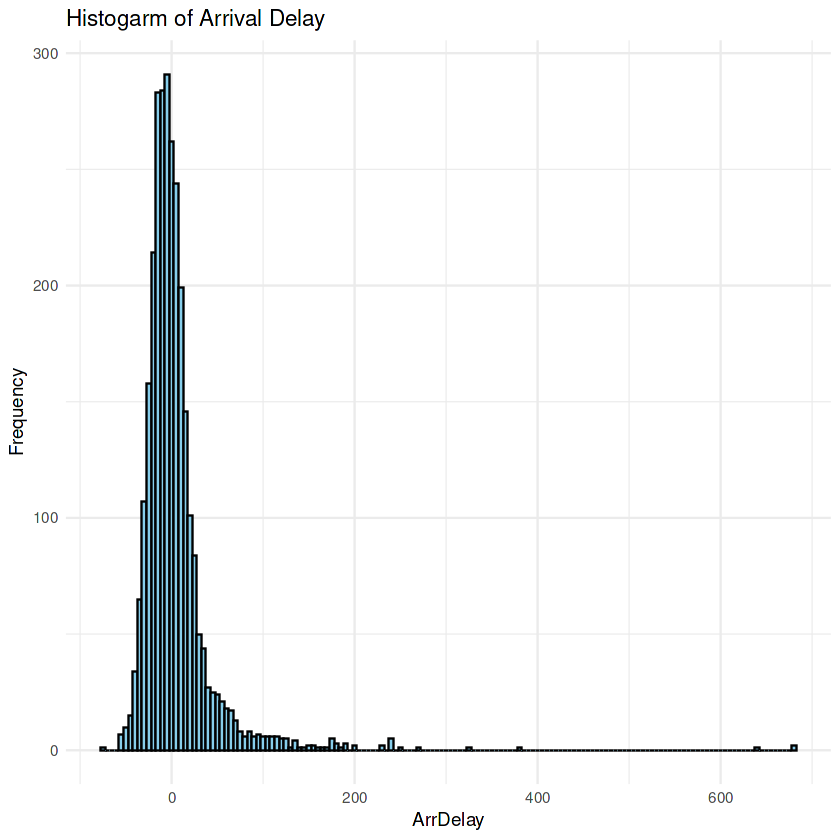

In [14]:
# Create a histogram of the "ArrDelay" column.

sub_airline %>% ggplot(aes(x=ArrDelay)) +
                geom_histogram(binwidth = 5, fill ="skyblue", color = "black") +
                labs(title = "Histogarm of Arrival Delay",
                     x = "ArrDelay",
                     y = "Frequency") +
                theme_minimal()

In [15]:
# Implement a binning strategy on the "ArrDelay" column, creating a new column with 4 bins.

sub_airline <- sub_airline %>%
                   mutate(ArrDelay_Bin = cut(ArrDelay,
                                            breaks = 4,
                                            labels = c("Low", "Moderate", "High", "Very High"),
                                            include.lowest = TRUE))

head(sub_airline)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay,ArrScaled,DepScaled,zs_ArrDelay,zs_DepDelay,ArrDelay_Bin
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,⋯,12.66667,-1,0,NA,NA,0.09933775,0.02409639,-0.04815631,-0.28063352,Low
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,⋯,12.66667,4,4,NA,NA,0.06887417,0.03078983,-0.60922513,-0.14031185,Low
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,⋯,12.66667,-8,0,NA,NA,0.07814570,0.01472557,-0.43846505,-0.47708387,Low
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,⋯,12.66667,7,7,NA,NA,0.09271523,0.03480589,-0.17012779,-0.05611884,Low
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,⋯,12.66667,-4,0,NA,NA,0.07947020,0.02008032,-0.41407075,-0.36482653,Low
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,⋯,12.66667,2,2,NA,NA,0.07019868,0.02811245,-0.58483083,-0.19644052,Low


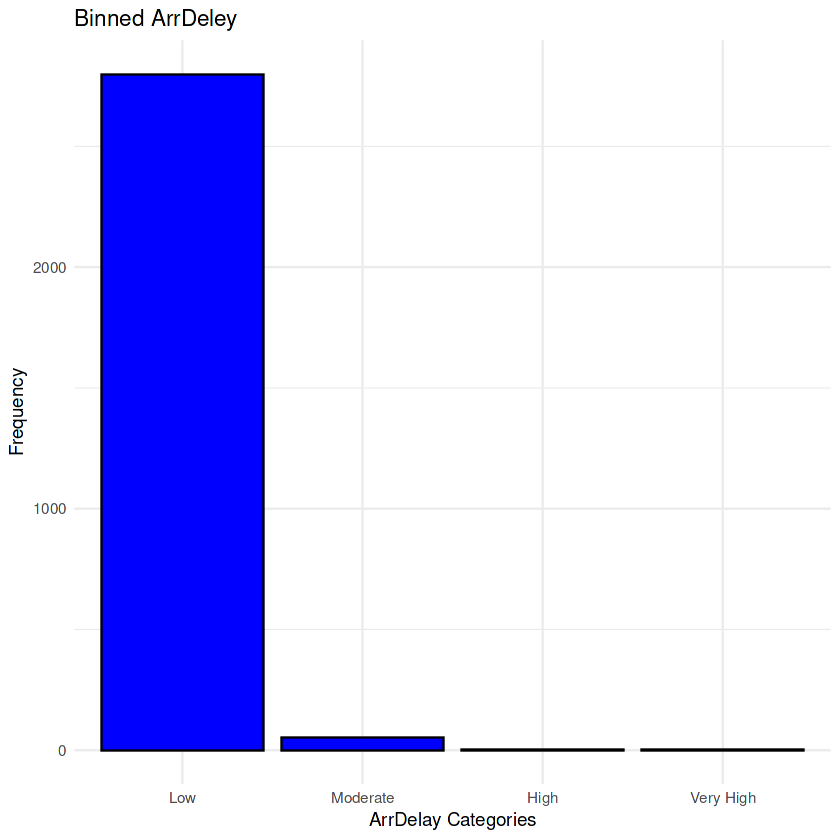

In [16]:
# Visualize the results of your binning using an appropriate plot.
sub_airline %>% ggplot(aes(x=ArrDelay_Bin)) +
                geom_bar(fill="blue", color="black") +
                labs(title='Binned ArrDeley',
                    x = "ArrDelay Categories",
                    y = "Frequency") +
              theme_minimal()

#### What insights does the histogram provide about the distribution of arrival delays?
Low Arrival Delay are occurred frequenly but there still have high or very high Delay still happened
#### How did you choose the number of bins, and what are the implications of this choice?

Detail vs. Overview: More bins offer more granularity, fewer bins simplify the view.

Interpretability: Fewer bins with meaningful labels make the data easier to explain.

Analysis Results: Too many bins can overwhelm models, while too few may hide important trends.

The 4-bin strategy provides a good balance for further analysis and visualization.
#### How might binning be useful in further analysis of this dataset?
Detects patterns: Binned data can help reveal hidden patterns or relationships that might not be clear in raw continuous data. For example, it’s easier to see how certain delay categories relate to cancellations or customer satisfaction.

Improves model performance: For classification models like decision trees, using binned categories instead of raw values can improve accuracy by making the data more structured and manageable.

Reduces noise: Binning can smooth out extreme values or outliers, which might otherwise skew analysis or modeling results.

## Task 4: Creating Indicator Variables (20 points)


In [17]:
# Create indicator variables (dummy variables) for the "Reporting_Airline" column.
sub_airline_dummy <- sub_airline %>%
  mutate(Reporting_Airline = as.factor(Reporting_Airline)) %>%  # Convert to factor
  pivot_wider(names_from = Reporting_Airline,                   # Create columns for each airline
              values_from = Reporting_Airline,                   # Use Reporting_Airline as values
              values_fn = length,                                # Count occurrences
              values_fill = 0,                                   # Fill NAs with 0
              names_prefix = "Airline_")                        # Prefix the new columns

# Display the first few rows of the modified dataframe
head(sub_airline_dummy)


Month,DayOfWeek,FlightDate,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,⋯,ArrDelay_Bin,Airline_UA,Airline_AS,Airline_DL,Airline_VX,Airline_HP,Airline_AA,Airline_B6,Airline_PA (1),Airline_TW
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,5,2003-03-28,LAX,JFK,2210,0615,2209,0617,2,⋯,Low,1,0,0,0,0,0,0,0,0
11,4,2018-11-29,LAX,JFK,1045,1912,1049,1851,-21,⋯,Low,0,1,0,0,0,0,0,0,0
8,5,2015-08-28,LAX,JFK,0805,1634,0757,1620,-14,⋯,Low,1,0,0,0,0,0,0,0,0
4,7,2003-04-20,LAX,JFK,2205,0619,2212,0616,-3,⋯,Low,0,0,1,0,0,0,0,0,0
11,3,2005-11-30,LAX,JFK,0840,1653,0836,1640,-13,⋯,Low,1,0,0,0,0,0,0,0,0
4,1,1992-04-06,LAX,JFK,1450,2308,1452,2248,-20,⋯,Low,1,0,0,0,0,0,0,0,0


In [18]:
colnames(sub_airline)

[1] "Month"             "DayOfWeek"         "FlightDate"       
 [4] "Reporting_Airline" "Origin"            "Dest"             
 [7] "CRSDepTime"        "CRSArrTime"        "DepTime"          
[10] "ArrTime"           "ArrDelay"          "ArrDelayMinutes"  
[13] "CarrierDelay"      "WeatherDelay"      "NASDelay"         
[16] "SecurityDelay"     "LateAircraftDelay" "DepDelay"         
[19] "DepDelayMinutes"   "DivDistance"       "DivArrDelay"      
[22] "ArrScaled"         "DepScaled"         "zs_ArrDelay"      
[25] "zs_DepDelay"       "ArrDelay_Bin"

In [19]:
# Create indicator variables for the "Month" column, using the "DepDelay" values instead of a constant.

sub_airline <- sub_airline %>%
    mutate(Month = as.factor(Month)) %>%
    pivot_wider(names_from = Month,
                values_from = DepDelay,
                values_fill = list(DepDelay=0),
                names_prefix = "Month_")

# Display the first few rows of your transformed data to verify the results.
head(sub_airline)

DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,⋯,Month_8,Month_4,Month_12,Month_2,Month_10,Month_6,Month_7,Month_1,Month_9,Month_5
<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,2,⋯,0,0,0,0,0,0,0,0,0,0
4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,-21,⋯,0,0,0,0,0,0,0,0,0,0
5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,-14,⋯,-8,0,0,0,0,0,0,0,0,0
7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,-3,⋯,0,7,0,0,0,0,0,0,0,0
3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,-13,⋯,0,0,0,0,0,0,0,0,0,0
1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,-20,⋯,0,2,0,0,0,0,0,0,0,0


#### How has the structure of the dataset changed after creating these indicator variables?
From Wide to Long: The dataset has transitioned from a single Reporting_Airline column to multiple indicator columns (dummy variables) representing each unique airline.

Increased Columns: The number of columns in the dataset has increased, reflecting the number of unique reporting airlines.
#### What are the potential benefits and drawbacks of using indicator variables in this context?

Enhanced Interpretability: Indicator variables simplify the representation of categorical data, making it easier to analyze and visualize relationships.

Facilitates Statistical Modeling: Many statistical models require numerical inputs, and dummy variables enable the inclusion of categorical features in regression and machine learning models.

Isolation of Effects: They allow for the examination of the individual impact of each airline on delays or other outcomes.

#### How might these indicator variables be useful in further analysis or modeling?
Increased Dimensionality: Adding many dummy variables can lead to a high-dimensional dataset, which may complicate analyses and models.

Overfitting Risk: In models with many indicators, there is a risk of overfitting, especially if the dataset is small relative to the number of variables.

Loss of Information: The original information about the categorical variable can be diluted since the dummy variables may not capture interactions between different categories.

## Task 5: Data Visualization (10 points)

List of 136
 $ line                            :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                            :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                            :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: l

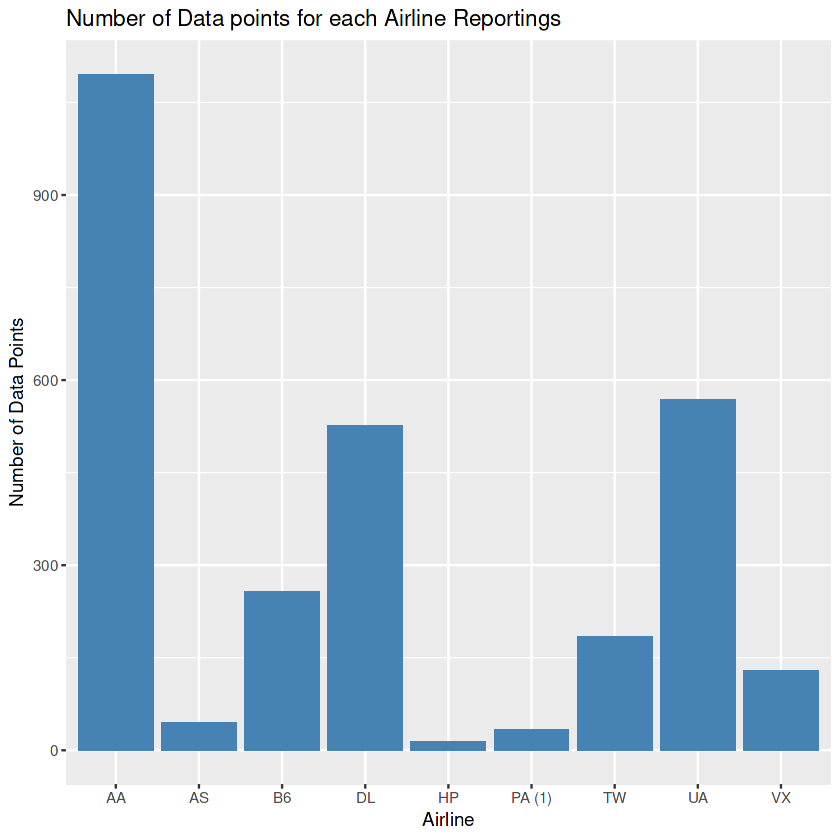

In [20]:
# Create a bar plot showing the number of data points for each airline in the dataset.
airline_counts <- sub_airline %>% 
    group_by(Reporting_Airline) %>%
    summarize(Count = n()) # counts the number of data

airline_counts %>% ggplot(aes(x =Reporting_Airline, y=Count)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(title = "Number of Data points for each Airline Reportings",
        x = "Airline",
        y = "Number of Data Points")
   theme_minimal()

#### Which airlines have the most and least data points in the dataset?
Airline_AA have the most data points and Airline_HP have the least data points in the dataset.

#### How might the differences in the number of data points affect any analysis or conclusions drawn from this dataset?

Airlines with more data points can yield more robust statistical analyses. A larger sample size increases the reliability of estimates and the ability to detect significant effects.
#### Suggest one additional visualization that could provide further insights into the dataset.

Box Plot of Arrival Delays by Airline: A box plot can be useful for visualizing the distribution of arrival delays (ArrDelay) for each airline. This will help identify variations in delays, outliers, and the overall performance of each airline.
